# Forecasting Faults in Electrical System Equipment
## To predict fault for manage the maintenance plan

In [5]:
import pandas as pd

input_file = 'https://raw.githubusercontent.com/Samuel-JULLY/KMUTNB_internship/refs/heads/main/DATA/import_export.csv'
df = pd.read_csv(input_file, sep=";", dtype=str)

# Nettoyer les espaces autour des valeurs
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Filtrer les lignes où 'tradeflow' n'est pas égal à "2"
df_filtré = df[df["tradeflow"] != "2"]

# Sauvegarder le résultat dans un nouveau fichier CSV
output_file = '/workspaces/KMUTNB_internship/RSLT/import_export_filtre.csv'
df_filtré.to_csv(output_file, index=False,encoding="utf-8-sig")

print(f"Fichier filtré sauvegardé sous : {output_file}")


Fichier filtré sauvegardé sous : /workspaces/KMUTNB_internship/RSLT/import_export_filtre.csv


/tmp/ipykernel_3891/4235782092.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


RMSE: 592509.64


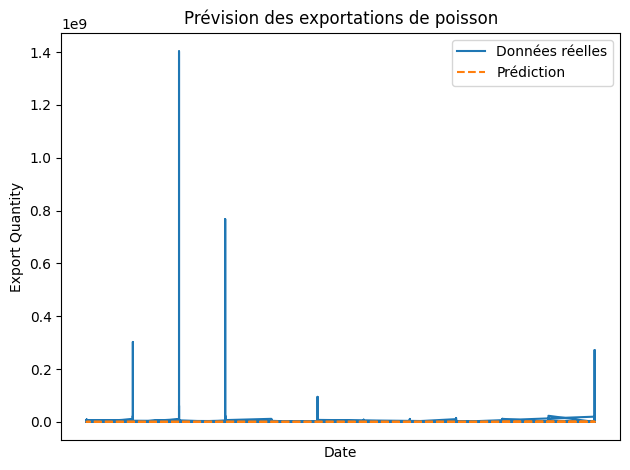

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Charger les données
df = pd.read_csv("C:/Users/noxra/AppData/Local/Programs/Microsoft VS Code/import_export_filtre.csv")

# Convertir la date en valeur numérique (ex: nombre de mois écoulés)
df['month'] = pd.to_datetime(df['month'])
df['month_num'] = (df['month'] - df['month'].min()).dt.days // 30

# Définir X et y
X = df[['month_num']]
y = df['quantity']

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire
y_pred = model.predict(X_test)

# Évaluer
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Affichage
plt.plot(df['month'], y, label="Données réelles")
plt.plot(df['month'].iloc[y_test.index], y_pred, label="Prédiction", linestyle="--")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Export Quantity")
plt.title("Prévision des exportations de poisson")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()